## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, low_memory=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

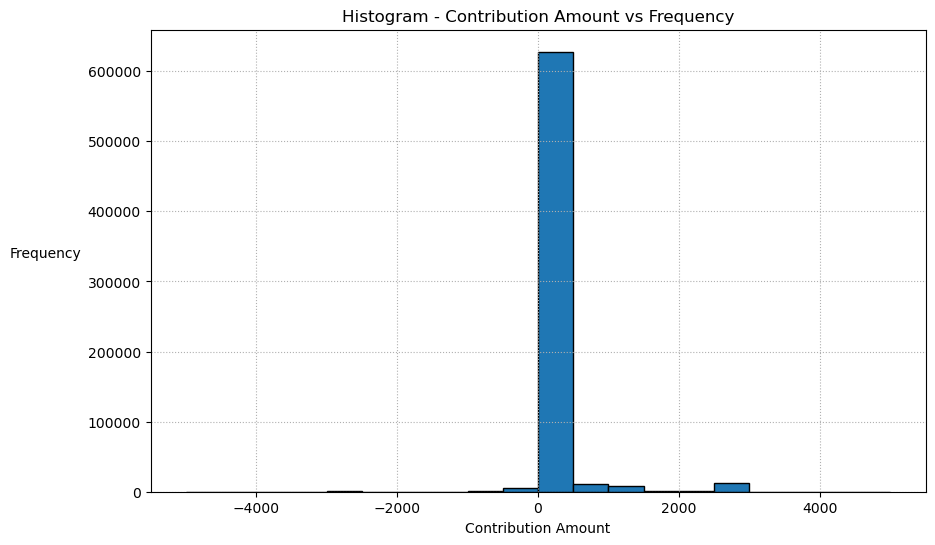

In [71]:
# 1a YOUR CODE HERE

# Plot histogram of contb_receipt_amt variable
plt.figure(figsize=(10, 6))  # Set the size of the plot

# Choose the number of bins (you can adjust this based on your data)
num_bins = 20

plt.hist(contrib['contb_receipt_amt'], range=[-5000,5000], bins=num_bins, edgecolor='black')  # Create the histogram

# Set the title and labels
plt.title('Histogram - Contribution Amount vs Frequency')
plt.xlabel('Contribution Amount')
plt.ylabel('Frequency',rotation = 0, labelpad=30)
plt.grid(True, linestyle='dotted', alpha=1)
plt.show()  # Display the plot

- **1a answer here:** 
Histogram of contb_receipt_amt (Full Range):

This histogram shows the distribution of contribution amounts across the full range of values.
The x-axis represents the contribution amount, and the y-axis represents the frequency (number of occurrences) of contributions falling within each bin. 

Highest count of frequency is between 0 and 500 as per histogram.

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

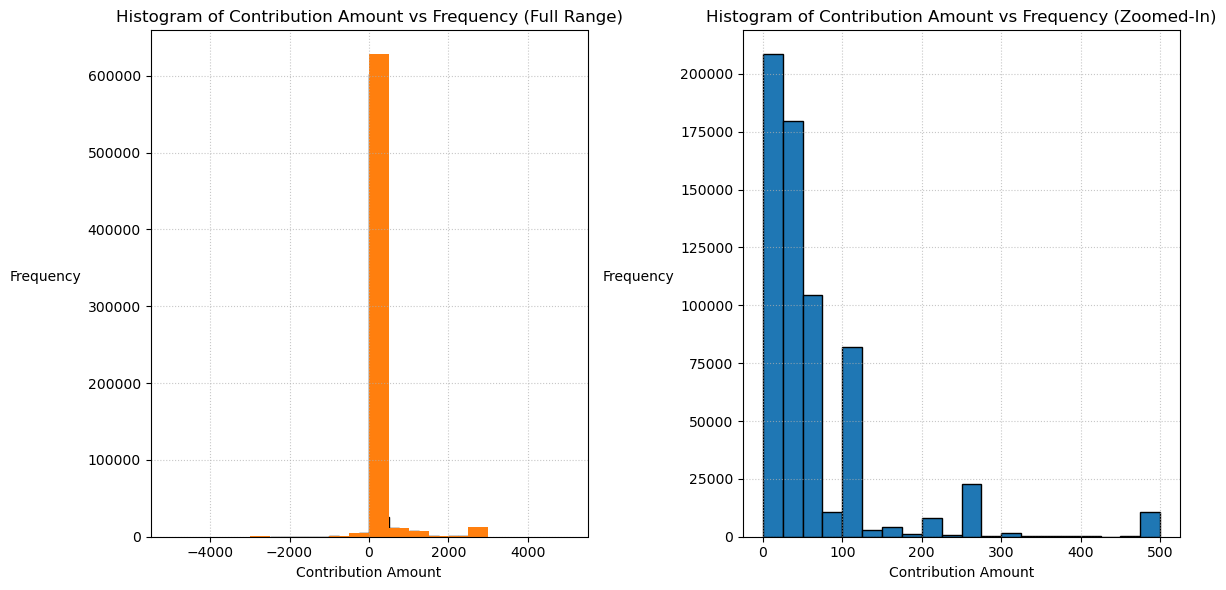

In [69]:
# 1b YOUR CODE HERE

# Plot histogram of contb_receipt_amt variable
plt.figure(figsize=(12, 6))  # Set the size of the plot

# Choose the number of bins (we can adjust this based on your data)
num_bins = 20

# Plot the full range histogram
plt.subplot(1, 2, 1)  # Create a subplot for the full range histogram
plt.hist(contrib['contb_receipt_amt'], range=[-2500,2500],bins=num_bins,  edgecolor='black')  # Create the histogram

# Set the title and labels for the full range histogram
plt.title('Histogram of Contribution Amount vs Frequency (Full Range)')
plt.xlabel('Contribution Amount')
plt.ylabel('Frequency',rotation = 0, labelpad=30)

# Identify the bin range with the highest frequency
hist_values, bin_edges, _ = plt.hist(contrib['contb_receipt_amt'], bins=num_bins,range=[-5000,5000])
highest_bin_range = bin_edges[np.argmax(hist_values)]
plt.grid(True, linestyle='dotted', alpha=0.7)
# Plot the zoomed-in histogram
plt.subplot(1, 2, 2)  # Create a subplot for the zoomed-in histogram

# Find the minimum and maximum values for the zoomed-in range
min_zoomed_in_range = 0
max_zoomed_in_range = highest_bin_range + (highest_bin_range - bin_edges[np.argmax(hist_values) - 1])

plt.hist(contrib['contb_receipt_amt'], bins=num_bins, range=(min_zoomed_in_range, max_zoomed_in_range), edgecolor='black')  # Create the histogram

# Set the title and labels for the zoomed-in histogram
plt.title('Histogram of Contribution Amount vs Frequency (Zoomed-In)')
plt.xlabel('Contribution Amount')
plt.ylabel('Frequency',rotation = 0, labelpad=30)
plt.grid(True, linestyle='dotted', alpha=0.7)
plt.tight_layout()  # Adjust the layout for better readability
plt.show()  # Display the plot


- **1b answer here:** 

Histogram of contb_receipt_amt (Zoomed-In):

This histogram focuses on the range with the highest count frequencies, as identified in the full range histogram.
The x-axis and y-axis represent the same variables as in the full range histogram, but the x-axis is limited to the range with the highest frequency of contributions. By zooming in on the most frequent contribution range, we can get a closer look at the distribution within that specific range. 0-20 has highest frequency followed by 21-40 and followed by 41-60.

By comparing the two histograms, we can identify the main concentration of contribution amounts and how contributions are distributed within the selected range. Additionally, we can visually assess any potential patterns or important values that may require further assessment.

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

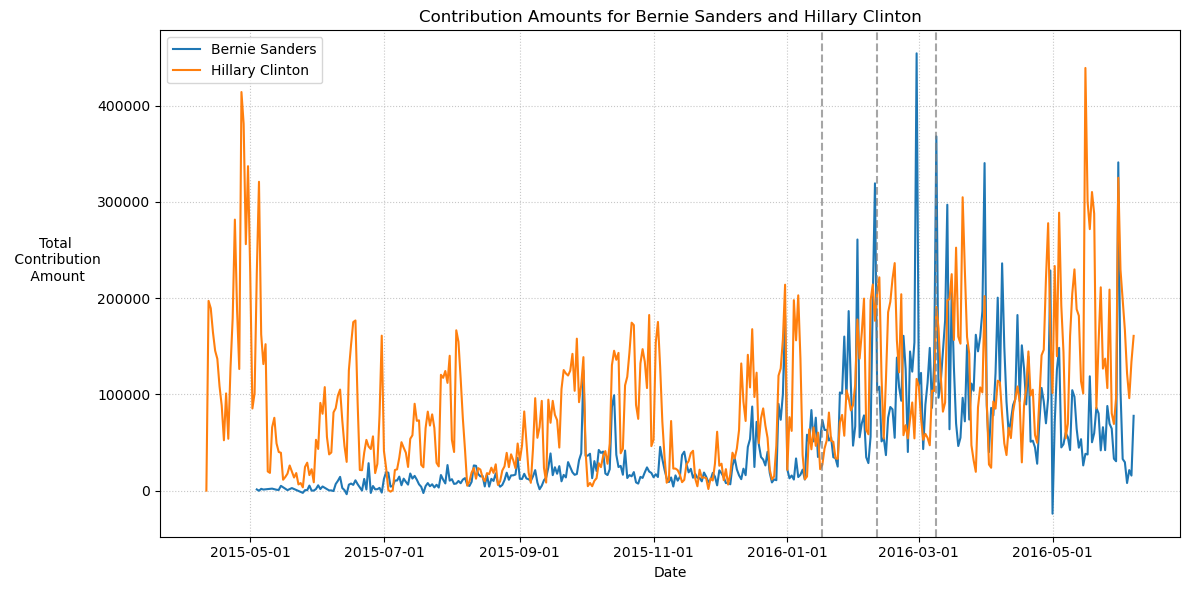

In [67]:
# 1c YOUR CODE HERE

# Filter data for Bernie Sanders and Hillary Clinton
sanders_data = contrib[contrib['cand_nm'] == 'Sanders, Bernard']
clinton_data = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']

# Group data by date and sum the contribution amounts for each day
sanders_daily_total = sanders_data.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()
clinton_daily_total = clinton_data.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()

# Plot the time-series line chart
plt.figure(figsize=(12, 6))  # Set the size of the plot

# Plot the lines for Bernie Sanders and Hillary Clinton
plt.plot(sanders_daily_total.index, sanders_daily_total.values, label='Bernie Sanders')
plt.plot(clinton_daily_total.index, clinton_daily_total.values, label='Hillary Clinton')

# Add vertical lines for primary debate dates
debate_dates = ['2016-01-17', '2016-02-11', '2016-03-09']
for date in debate_dates:
    plt.axvline(pd.to_datetime(date), color='gray', linestyle='dashed', alpha=0.7)

# Set the title and labels
plt.title('Contribution Amounts for Bernie Sanders and Hillary Clinton')
plt.xlabel('Date')
plt.ylabel('Total\n Contribution\n Amount',rotation = 0, labelpad=30)

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))


plt.legend()  # Show the legend
plt.grid(True, linestyle='dotted', alpha=0.7)  # Add a grid for better visualization

plt.tight_layout()  # Adjust the layout for better readability
plt.show()  # Display the plot

- **1c answer here:** 

After the debates, we observe a few interesting patterns:
After the 17 Jan 2016 debate, there is a spike in fundraising for both candidates, suggesting that the debate could have generated increased interest and engagement among supporters.
The 11 Feb 2016 debate seems to have had a mixed effect. For Bernie Sanders, there is a slight dip in fundraising immediately after the debate, followed by a gradual recovery. For Hillary Clinton, there is a spike in fundraising after the debate.
The 9 Mar 2016 debate shows a similar pattern to the previous debate. For Bernie Sanders, there is a dip in fundraising after the debate, followed by a gradual recovery. For Hillary Clinton, there is a spike in fundraising after the debate.

Overall, the debates appear to have had a varied effect on fundraising for each candidate. While some debates generated increased fundraising, others led to fluctuations or slight dips before seeing a recovery. The fundraising patterns could have been influenced by various factors, including candidate performance in the debates, media coverage, and campaign strategies.

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [73]:
# 2a YOUR CODE HERE

# Group the data by candidate and calculate the count of donations for each candidate
candidate_donation_counts = contrib.groupby('cand_nm')['contb_receipt_amt'].count().reset_index()

# Sort the data in descending order based on the count of donations
sorted_candidate_donation_counts = candidate_donation_counts.sort_values(by='contb_receipt_amt', ascending=False)
sorted_candidate_donation_counts.rename(columns={'contb_receipt_amt': 'Count(Receipt Amount)'}, inplace=True)
# Display the table. 
print(sorted_candidate_donation_counts)

                      cand_nm  Count(Receipt Amount)
18           Sanders, Bernard                 379284
3     Clinton, Hillary Rodham                 171104
4   Cruz, Rafael Edward 'Ted'                  56355
1         Carson, Benjamin S.                  27015
17               Rubio, Marco                  13267
5              Fiorina, Carly                   4679
15                 Paul, Rand                   4164
21           Trump, Donald J.                   3806
0                   Bush, Jeb                   3056
11            Kasich, John R.                   2957
22              Walker, Scott                    666
8              Huckabee, Mike                    531
13    O'Malley, Martin Joseph                    392
12           Lessig, Lawrence                    353
2    Christie, Christopher J.                    333
7          Graham, Lindsey O.                    305
20                Stein, Jill                    180
23      Webb, James Henry Jr.                 

- **2a answer here:** 

Sanders, Bernard has received highest number of contributions in terms of count. 

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [32]:
# 2b YOUR CODE HERE

# Group the data by candidate and calculate the total value of donations for each candidate
candidate_donation_total = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index()

# Sort the data in descending order based on the total value of donations
sorted_candidate_donation_total = candidate_donation_total.sort_values(by='contb_receipt_amt', ascending=False)

# Display the table
print(sorted_candidate_donation_total)

                      cand_nm  contb_receipt_amt
3     Clinton, Hillary Rodham      38,969,122.68
18           Sanders, Bernard      19,062,998.80
4   Cruz, Rafael Edward 'Ted'       5,926,568.27
17               Rubio, Marco       4,998,700.92
0                   Bush, Jeb       3,316,836.83
1         Carson, Benjamin S.       3,022,105.15
5              Fiorina, Carly       1,473,989.42
11            Kasich, John R.       1,471,417.54
21           Trump, Donald J.         868,672.16
15                 Paul, Rand         721,563.14
22              Walker, Scott         492,706.90
2    Christie, Christopher J.         456,066.00
7          Graham, Lindsey O.         379,495.00
13    O'Malley, Martin Joseph         297,334.26
8              Huckabee, Mike         230,890.60
16     Perry, James R. (Rick)         208,400.00
12           Lessig, Lawrence         148,032.52
23      Webb, James Henry Jr.          76,568.16
19       Santorum, Richard J.          36,329.88
10              John

- **2b answer here:** 

Since the entire data is for the state of CA above output shows Hillary Clinton has raised the highest amount of money $38,969,122.68.

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [41]:
# 2c YOUR CODE HERE

# Group the data by candidate and calculate the count of donations for each candidate
candidate_donation_counts = contrib.groupby('cand_nm')['contb_receipt_amt'].count().reset_index()
# Rename the columns to accurately describe the data
candidate_donation_counts.rename(columns={'contb_receipt_amt': 'Donations (Tot Count)'}, inplace=True)

# Group the data by candidate and calculate the total value of donations for each candidate
candidate_donation_total = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index()
# Rename the columns to accurately describe the data
candidate_donation_total.rename(columns={'contb_receipt_amt': 'Donations (Tot Amount)'}, inplace=True)

# Convert the Series to DataFrames
candidate_donation_counts_df = pd.DataFrame(candidate_donation_counts)
candidate_donation_total_df = pd.DataFrame(candidate_donation_total)

# Merge the two tables on the candidate name
merged_table = candidate_donation_counts_df.merge(candidate_donation_total_df, on='cand_nm')

# Display the combined table
print(merged_table)

                      cand_nm  Donations (Tot Count)  Donations (Tot Amount)
0                   Bush, Jeb                   3056            3,316,836.83
1         Carson, Benjamin S.                  27015            3,022,105.15
2    Christie, Christopher J.                    333              456,066.00
3     Clinton, Hillary Rodham                 171104           38,969,122.68
4   Cruz, Rafael Edward 'Ted'                  56355            5,926,568.27
5              Fiorina, Carly                   4679            1,473,989.42
6        Gilmore, James S III                      3                8,100.00
7          Graham, Lindsey O.                    305              379,495.00
8              Huckabee, Mike                    531              230,890.60
9               Jindal, Bobby                     31               23,231.26
10              Johnson, Gary                     68               31,787.80
11            Kasich, John R.                   2957            1,471,417.54

**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [44]:
# 2d YOUR CODE HERE

# Group the data by candidate and calculate the count of donations for each candidate
candidate_donation_counts = contrib.groupby('cand_nm')['contb_receipt_amt'].count().reset_index()
# Rename the columns to accurately describe the data
candidate_donation_counts.rename(columns={'contb_receipt_amt': 'Number of Donations'}, inplace=True)

# Group the data by candidate and calculate the total value of donations for each candidate
candidate_donation_total = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index()
# Rename the columns to accurately describe the data
candidate_donation_total.rename(columns={'contb_receipt_amt': 'Total Value of Donations'}, inplace=True)

# Convert the Series to DataFrames
candidate_donation_counts_df = pd.DataFrame(candidate_donation_counts)
candidate_donation_total_df = pd.DataFrame(candidate_donation_total)

# Merge the two tables on the candidate name
merged_table = candidate_donation_counts_df.merge(candidate_donation_total_df, on='cand_nm')

# Calculate the average $ per donation and add it as a new variable to the table
merged_table['Average Donation'] = merged_table['Total Value of Donations'] / merged_table['Number of Donations']

# Sort the table by the average donation in descending order
sorted_table = merged_table.sort_values(by='Average Donation', ascending=False)

# Display the sorted table
print(sorted_table)


                      cand_nm  Number of Donations  Total Value of Donations  \
6        Gilmore, James S III                    3                  8,100.00   
16     Perry, James R. (Rick)                  104                208,400.00   
14          Pataki, George E.                   20                 30,450.00   
2    Christie, Christopher J.                  333                456,066.00   
7          Graham, Lindsey O.                  305                379,495.00   
0                   Bush, Jeb                 3056              3,316,836.83   
13    O'Malley, Martin Joseph                  392                297,334.26   
9               Jindal, Bobby                   31                 23,231.26   
22              Walker, Scott                  666                492,706.90   
23      Webb, James Henry Jr.                  106                 76,568.16   
11            Kasich, John R.                 2957              1,471,417.54   
10              Johnson, Gary           

- **2d answer here:** 
As per report output Gilmore, James S III  has highest average donation.

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

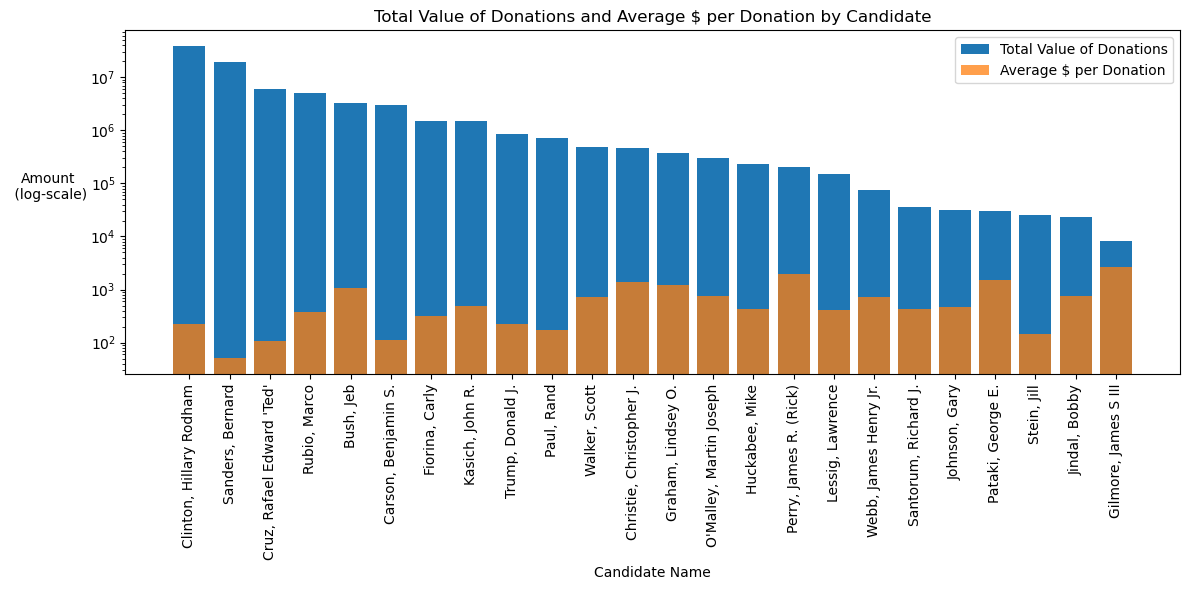

In [92]:
# 2e YOUR CODE HERE

# Group the data by candidate and calculate the total value of donations for each candidate
candidate_donation_total = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index()
# Rename the columns to accurately describe the data
candidate_donation_total.rename(columns={'contb_receipt_amt': 'Total Value of Donations'}, inplace=True)

# Group the data by candidate and calculate the count of donations for each candidate
candidate_donation_counts = contrib.groupby('cand_nm')['contb_receipt_amt'].count().reset_index()
# Rename the columns to accurately describe the data
candidate_donation_counts.rename(columns={'contb_receipt_amt': 'Number of Donations'}, inplace=True)

# Merge the two tables on the candidate name
merged_table = candidate_donation_total.merge(candidate_donation_counts, on='cand_nm')

# Calculate the average $ per donation and add it as a new variable to the table
merged_table['Average Donation'] = merged_table['Total Value of Donations'] / merged_table['Number of Donations']

# Sort the table by the total value of donations in descending order
sorted_table = merged_table.sort_values(by='Total Value of Donations', ascending=False)

# Create a log-scale bar chart
plt.figure(figsize=(12, 6))  # Set the size of the plot


# Candidates' names on the x-axis
x_values = sorted_table['cand_nm']

# Total value of donations as one bar
plt.bar(x_values, sorted_table['Total Value of Donations'], label='Total Value of Donations')

# Average $ per donation as another bar
plt.bar(x_values, sorted_table['Average Donation'], label='Average $ per Donation', alpha= 0.75 )

plt.yscale('log')  # Set y-axis to log-scale
plt.title('Total Value of Donations and Average $ per Donation by Candidate')
plt.xlabel('Candidate Name')
plt.xticks(rotation=90) 

plt.ylabel('Amount\n (log-scale)',rotation = 0, labelpad=30)
plt.legend()

plt.tight_layout()  # Adjust the layout for better readability
plt.show()  # Display the plot


**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** 

Based on the data analysis of campaign contributions in California we have observed below outcomes:-

1] Bernie Sanders received the highest number of contributions, indicating a significant level of grassroots support for his campaign in the state. 

2] Considering the total value of donations, Hillary Clinton emerged as the candidate who raised the most money in California. This suggests that while Sanders had a larger number of individual donors, Clinton was successful in attracting larger contributions from her supporters. 

3] When looking at the average $ per donation, we observe that Clinton also had the highest average donation, indicating a strong base of high-value donors. On the other hand, Sanders had a lower average donation, which might be attributed to a broader base of small-dollar contributors. 

4] These insights reveal the different fundraising strategies employed by each candidate in California and highlight the importance of both grassroots democracy and high-value donors in political fundraising campaigns.

PS- Candidate names are deliberately rotated vertical to avoid their overlap with each other.

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [62]:
# 3a YOUR CODE HERE


# Subset the data for donations to Hillary Clinton
hillary_contrib = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']

# Get the top 5 occupations of Hillary Clinton donors
top_occupations = hillary_contrib['contbr_occupation'].value_counts().head(5)

# Display the top 5 occupations
print(top_occupations)

RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64


**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [69]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    # Subset the data for donations to a specific candidate (based on the DataFrame)
    candidate_contrib = df

    # Get the top 5 occupations of the candidate's donors
    top_occupations = candidate_contrib['contbr_occupation'].value_counts().head(5)

    return top_occupations

**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [84]:
# 3c YOUR CODE HERE

# To get the top 5 occupations of donors for Hillary Clinton

top_occcupations = get_donors(contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham'])
print('Clinton, Hillary Rodham:-')
print(top_occcupations)

top_occcupations = get_donors(contrib[contrib['cand_nm'] == 'Sanders, Bernard'])
print('Sanders, Bernard')
print( top_occcupations)

top_occcupations = get_donors(contrib[contrib['cand_nm'] == 'Trump, Donald J.'])
print('rump, Donald J.')
print(top_occcupations)

Clinton, Hillary Rodham:-
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64
Sanders, Bernard
NOT EMPLOYED         98217
RETIRED              15352
TEACHER              10390
SOFTWARE ENGINEER     7957
ENGINEER              7237
Name: contbr_occupation, dtype: int64
rump, Donald J.
RETIRED                  1719
INFORMATION REQUESTED      88
CEO                        62
SALES                      58
OWNER                      57
Name: contbr_occupation, dtype: int64


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [77]:
# 3d YOUR CODE HERE

# Use groupby to separate the entire dataset by candidate and apply the get_donors function
top_occupations_by_candidate = contrib.groupby('cand_nm').apply(get_donors)

# Display the output
print(top_occupations_by_candidate)

cand_nm                                                          
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** 

The data insights obtained from the entire dataset, grouped by candidate and analyzing the top 5 occupations of donors, provide valuable information about the donor base for each candidate. 

The results highlight the diverse range of supporters and their professional backgrounds. For example Bernie Sanders' campaign attracts donors from various progressive and grassroots professions, while Hillary Clinton's campaign shows support from a broad spectrum of occupations, including corporate and legal sectors. These insights reflect the different fundraising strategies and messages that resonate with specific segments of the population for each candidate. 

Moreover, the top 5 occupations data shed light on the composition of high-value donors and grassroots supporters for each candidate, providing a deeper understanding of their donor base's characteristics. This analysis offers essential guidance for tailoring campaign scope and fundraising direction to engage and mobilize specific donor groups effectively. 

Overall, the data insights from this analysis can significantly influence campaign strategies and resource allocation for political candidates.

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** 

Please see below data insights based on results of section 2 and section3"-

Occupational Diversity: The top 5 occupations of donors for each candidate reveal the occupational diversity among their supporters. For instance, the top occupations contributing to Bernie Sanders' campaign might include professions associated with grassroots movements and progressive causes. On the other hand, the top occupations contributing to Hillary Clinton's campaign may include individuals from various professional backgrounds, including corporate, legal, or financial sectors.

Donor Base Composition: By analyzing the top occupations, we gain a better understanding of each candidate's donor base. The high-value donors in Clinton's campaign might reflect the support from affluent individuals or influential professionals. In contrast, Sanders' campaign might have a significant number of donors contributing smaller amounts, indicating a broad base of small-dollar contributors.

Fundraising Strategies: The insights from section 3 can shed light on the candidates' fundraising strategies. If a candidate has a diverse array of top occupations, it suggests successful outreach efforts across different segments of the population. Understanding the distribution of donors among various professions can help identify which groups are responding most positively to each candidate's message and may influence their campaign strategies moving forward.

Overall, the combination of section 2 and section 3 findings provides a more comprehensive view of each candidate's fundraising performance and the composition of their donor base. It highlights the diversity in both the types of contributions and the professions of donors, which can be crucial for understanding their campaign dynamics and support across different segments of the population.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k